In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
import math

import IPython as display
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\PC\\Desktop\\Data analysis_udacity\\practicing\\house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# this is to check if there is a raw with price columns NaN
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [18]:
# what is the range of house pricing for medium houses

# First we have to identify the aspects related to house size , 'bedrooms','bathrooms','sqft_living','sqft_lot'

price_mid_hs = df[['price','bedrooms','bathrooms','sqft_living15','sqft_lot15','grade']]
print(price_mid_hs.shape)

#now we have all house sizing aspects in standalone DataFrame, we can the medium of the messurement and compare it with size. First drop all prices that are above the mean.

# 1. Count the Price mean
Price_mean = price_mid_hs.price.mean()
print(Price_mean)

# 2. remove any raw that hold any price larger than the mean
md_price_mid_hs = price_mid_hs[price_mid_hs.price < Price_mean]
print(md_price_mid_hs.shape)

new_Price_mean  = math.floor(md_price_mid_hs.price.mean())
print(new_Price_mean)

# 3. Count all mediums of all house size aspect
new_bedrooms_mean = math.floor(md_price_mid_hs.bedrooms.mean())
new_bathrooms_mean = math.floor(md_price_mid_hs.bathrooms.mean())
new_sqft_living_mean = math.floor(md_price_mid_hs.sqft_living15.mean())
new_sqft_lot_mean = math.floor(md_price_mid_hs.sqft_lot15.mean())
new_grade_mean = math.floor(md_price_mid_hs.grade.mean())

# 4. print the result of the conclusion
print(f"the expected aspects of the house size for this range of price slitly more or less than {new_Price_mean}$, as follow, Bedrooms: {new_bedrooms_mean}, Bathrooms: {new_bathrooms_mean}, sqft_living: {new_sqft_living_mean}, sqft_lot: {new_sqft_lot_mean}, and the approximite grade is {new_grade_mean}")
#price_mid_hs[price_mid_hs.bedrooms.mean() > 0.5]

#price_mid_hs.bedrooms.mean().sum(axis = 0)


(21613, 5)
540182.1587933188
(13694, 5)
355475
the expected aspects of the house size for this range of price slitly more or less than 355475$, as follow, Bedrooms: 3, Bathrooms: 1, sqft_living: 1721, sqft_lot: 11065


In [ ]:
plt.figure(figsize=(15, 15))


sns.heatmap(price_mid_hs.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) , annot=True, fmt=".2f")

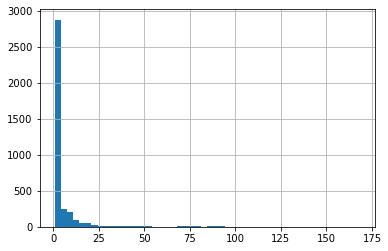

In [132]:
# price_mid_hs.groupby(['bedrooms','bathrooms','sqft_living','sqft_lot']).mean()['price'].value_counts().hist(bins=50)

In [19]:
contry_df = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
contry_df.shape

(21613, 19)

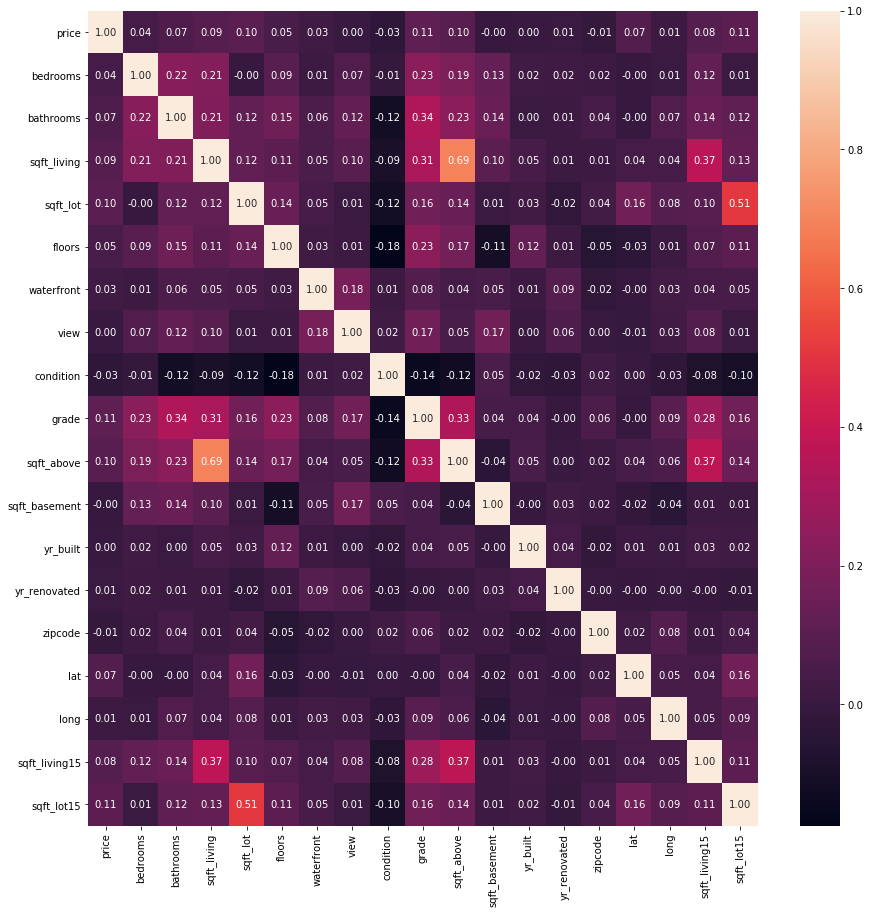

In [21]:
plt.figure(figsize=(15, 15))
corr = contry_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(corr,annot=True, fmt=".2f")

In [25]:
corr_target = abs(corr["price"])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.10]
relevant_features

price         1.000000
sqft_lot      0.101891
grade         0.109556
sqft_lot15    0.108943
Name: price, dtype: float64

In [20]:
# fill_mean = lambda col: col.fillna(col.mean())
# # fill_df = price_cal.apply(fill_mean, axis=0)
# # fill_df.shape

# qu_cal = all_rm.select_dtypes(include=['float64','int64'])
# qu_cal.shape[1]
# fill_df = qu_cal.apply(fill_mean, axis=0)
# fill_df.shape
# #qu_cal.head()
# # for col in list(price_cal.columns):
# #     if price_cal[col].dtypes == 'float64' or price_cal[col].dtypes == 'int64':
# #         price_cal_cp[col].fillna(df.mean())
# #     else:
# #         pass

# all_rm.select_dtypes(include='float').fillna(df.select_dtypes(include='float').mean().iloc[0],inplace=True)
# all_rm.select_dtypes(include='int64').fillna(df.select_dtypes(include='float').mean().iloc[0],inplace=True)
# all_rm.select_dtypes(include='object').fillna(df.select_dtypes(include='float').mode().iloc[0],inplace=True)


In [50]:
y = price_cal[['high','low','close','change','change_percent','volume_traded','value_traded_SAR','number_trades']]
x = price_cal['open',]

In [108]:
# xn, xt, yn, yt = train_test_split(x, y, test_size=0.3, random_state=42)
# lm_model = LinearRegression(normalize=True)

# xn= xn.values.reshape(-1, 1)
# yn= yn.values.reshape(-1, 1)
# xt = xt.values.reshape(-1, 1)

# lm_model.fit(xn,yn)

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    #Drop respondent and expected salary columns
    df = df.drop(['price'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(contry_df) 


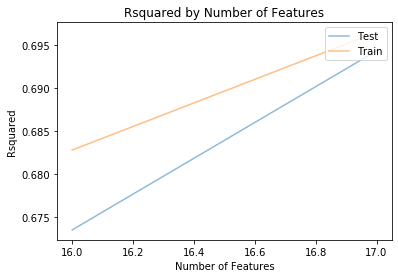

In [116]:
cutoffs = [500,300,250,200,120, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)
# x2n, x2t, y2n, y2t = train_test_split(X, y, test_size = 0.8, random_state = 42)

# lm2_model = LinearRegression(normalize=True)
# lm2_model.fit(x2n,y2n)

# y_test_preds = lm2_model.predict(x2t) 

# rsquared_score = r2_score(y2t, y_test_preds) 
# length_y_test = len(y2t)

# #Rsquared and y_test


# "The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

In [117]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

# "The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

17
0.6943248324345249
0.6964903903225679
